# What is the average number of breaks of serve per match?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

statistics_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_statistics_parquet"):
    single_stats = pd.read_parquet("raw/raw_statistics_parquet/" + file)
    statistics_dataframe = pd.concat([statistics_dataframe, single_stats], axis= 'rows', ignore_index=True)

statistics_dataframe.head(10)


,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0
3,11674074,ALL,service,second_serve,17/18 (94%),28/31 (90%),1,positive,team,17,28,18.0,31.0
4,11674074,ALL,service,first_serve_points,25/34 (74%),11/26 (42%),1,positive,team,25,11,34.0,26.0
5,11674074,ALL,service,second_serve_points,14/18 (78%),18/31 (58%),1,positive,team,14,18,18.0,31.0
6,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,9,NaN,NaN
7,11674074,ALL,service,break_points_saved,0/1 (0%),1/5 (20%),2,positive,team,0,1,1.0,5.0
8,11674074,ALL,points,total,67,42,1,positive,event,67,42,NaN,NaN
9,11674074,ALL,points,service_points_won,39,29,1,positive,event,39,29,NaN,NaN


### Steps:
1. Identify break points saved and service games played:

    - The column statistic_name includes break_points_saved, which indicates how many break points were saved by each player.
    - The column service_games_played shows how many service games each player had.
    - By analyzing the difference between break points saved and service games played, we can infer the number of breaks of serve (i.e., the number of service games lost).

2. Calculate breaks of serve:

    - Breaks can be calculated using: ***breaks = service games played − break points saved***

    - This formula estimates the number of games where the server lost their serve.

3. Sum the breaks per match:

    - For each match, sum the breaks of serve for both the home and away players.

4. Calculate the average number of breaks per match:

    - Once we have the total number of breaks for each match, we can calculate the average.

In [2]:
# Step 1: Filter the statistics for 'service_games_played' and 'break_points_saved'
service_games_df = statistics_dataframe[statistics_dataframe['statistic_name'] == 'service_games_played']
break_points_saved_df = statistics_dataframe[statistics_dataframe['statistic_name'] == 'break_points_saved']

# Step 2: Merge the two DataFrames to compare service games and break points saved
merged_df = service_games_df.merge(break_points_saved_df, on='match_id', suffixes=('_service_games', '_break_points_saved'))

# Step 3: Calculate breaks of serve
merged_df['home_breaks_of_serve'] = merged_df['home_value_service_games'] - merged_df['home_value_break_points_saved']
merged_df['away_breaks_of_serve'] = merged_df['away_value_service_games'] - merged_df['away_value_break_points_saved']

# Step 4: Calculate the total number of breaks per match (home + away)
merged_df['total_breaks_of_serve'] = merged_df['home_breaks_of_serve'] + merged_df['away_breaks_of_serve']

# Step 5: Calculate the average number of breaks of serve per match
average_breaks_per_match = merged_df['total_breaks_of_serve'].mean()

# Display the result
print(f"The average number of breaks of serve per match is {average_breaks_per_match:.2f}.")


The average number of breaks of serve per match is 7.01.


In [6]:
merged_df

,match_id,period_service_games,statistic_category_name_service_games,statistic_name_service_games,home_stat_service_games,away_stat_service_games,compare_code_service_games,statistic_type_service_games,value_type_service_games,home_value_service_games,...,compare_code_break_points_saved,statistic_type_break_points_saved,value_type_break_points_saved,home_value_break_points_saved,away_value_break_points_saved,home_total_break_points_saved,away_total_break_points_saved,home_breaks_of_serve,away_breaks_of_serve,total_breaks_of_serve
0,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,...,2,positive,team,0,1,1.0,5.0,10,8,18
1,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,...,2,positive,team,0,1,1.0,3.0,10,8,18
2,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,...,3,positive,team,0,0,0.0,2.0,10,9,19
3,11674074,1ST,service,service_games_played,6,6,3,positive,event,6,...,2,positive,team,0,1,1.0,5.0,6,5,11
4,11674074,1ST,service,service_games_played,6,6,3,positive,event,6,...,2,positive,team,0,1,1.0,3.0,6,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,11703525,1ST,service,service_games_played,5,5,3,positive,event,5,...,3,positive,team,0,0,0.0,1.0,5,5,10
2329,11703525,1ST,service,service_games_played,5,5,3,positive,event,5,...,1,positive,team,1,1,1.0,2.0,4,4,8
2330,11703525,2ND,service,service_games_played,6,6,3,positive,event,6,...,1,positive,team,1,1,1.0,3.0,5,5,10
2331,11703525,2ND,service,service_games_played,6,6,3,positive,event,6,...,3,positive,team,0,0,0.0,1.0,6,6,12


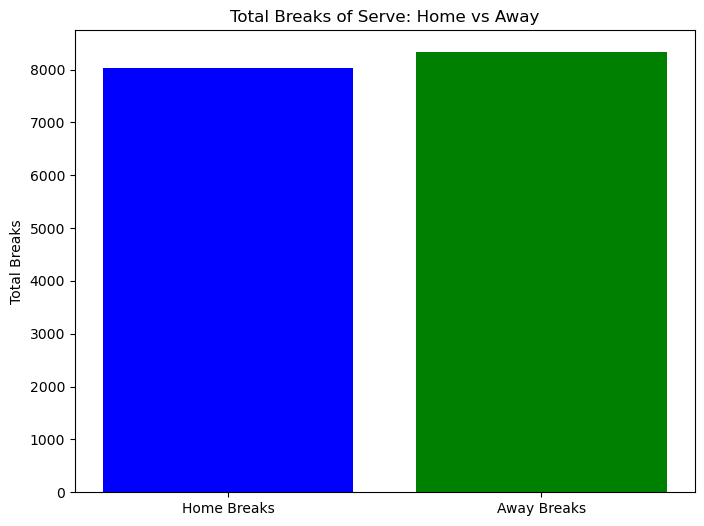

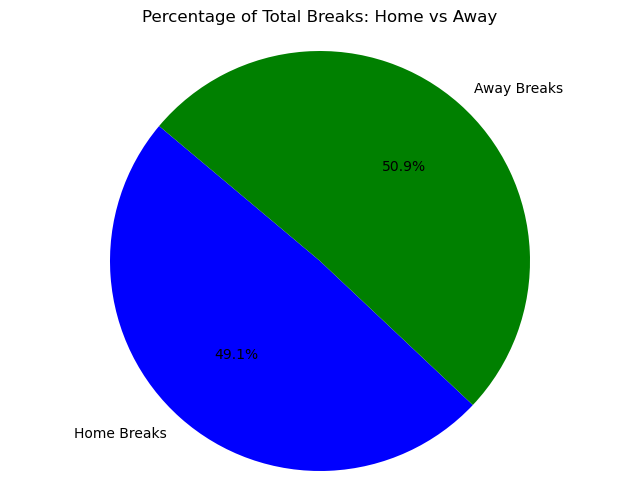

In [3]:


# گام 1: محاسبه مجموع بریک‌های خانگی و مهمان
total_home_breaks = merged_df['home_breaks_of_serve'].sum()
total_away_breaks = merged_df['away_breaks_of_serve'].sum()

# محاسبه درصد بریک‌های خانگی و مهمان
total_breaks = total_home_breaks + total_away_breaks
home_breaks_percentage = (total_home_breaks / total_breaks) * 100
away_breaks_percentage = (total_away_breaks / total_breaks) * 100

# گام 2: رسم نمودار میله‌ای
plt.figure(figsize=(8, 6))
plt.bar(['Home Breaks', 'Away Breaks'], [total_home_breaks, total_away_breaks], color=['blue', 'green'])
plt.title('Total Breaks of Serve: Home vs Away')
plt.ylabel('Total Breaks')
plt.show()

# گام 3: رسم نمودار دایره‌ای
plt.figure(figsize=(8, 6))
labels = ['Home Breaks', 'Away Breaks']
sizes = [home_breaks_percentage, away_breaks_percentage]
colors = ['blue', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Breaks: Home vs Away')
plt.axis('equal')  # برای نمایش صحیح دایره‌ای
plt.show()


In [7]:
print(f"Total home breaks: {total_home_breaks}")
print(f"Total away breaks: {total_away_breaks}")
print(f"Total breaks: {total_breaks}")


Total home breaks: 8026
Total away breaks: 8326
Total breaks: 16352


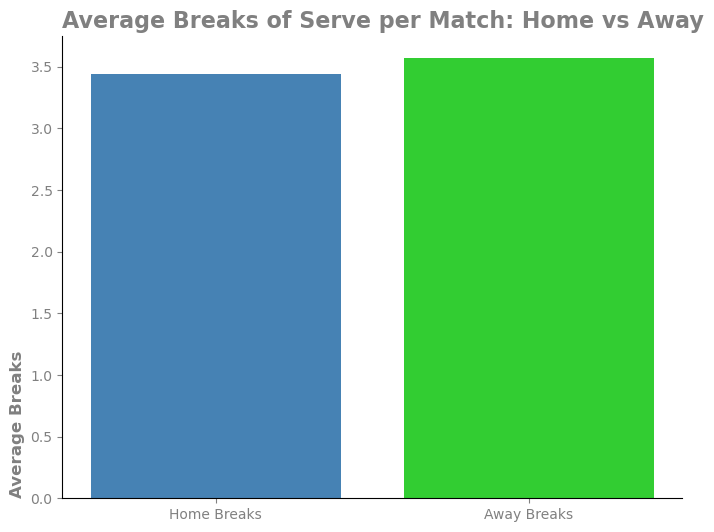

In [12]:
average_home_breaks = merged_df['home_breaks_of_serve'].mean()
average_away_breaks = merged_df['away_breaks_of_serve'].mean()

# نمودار میله‌ای بر اساس میانگین‌ها
plt.figure(figsize=(8, 6))
plt.bar(['Home Breaks', 'Away Breaks'], [average_home_breaks, average_away_breaks], color=['#4682b4', '#32cd32'])
plt.title('Average Breaks of Serve per Match: Home vs Away', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.ylabel('Average Breaks', fontsize=12, color='gray', loc='bottom', fontweight='bold')
plt.tick_params(colors='gray')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()
